In [728]:
import numpy as np
import matplotlib.pyplot as plt

In [729]:
def normal(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def erf(x):
    x0 = np.abs(x)
    sign = np.sign(x)
    # Approximation of the error function
    p = 0.3275911
    a1 = 0.254829592
    a2 = -0.284496736
    a3 = 1.421413741
    a4 = -1.453152027
    a5 = 1.061405429
    t = 1.0 / (1.0 + p * x0)
    return (1.0 - ((a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5) * np.exp(-x0**2)))*sign

## From Abramowitz & Stegun (1964), formula 7.1.26, Handbook of Mathematical Functions: with Formulas, Graphs, and Mathematical Tables

In [730]:
### Truncated Gaussian distribution

# The limits for the distribution are:
xmin = 60
xmax = 160

def GCDF(x):
    return 1/2 * (1 + erf(x/np.sqrt(2))) 

def TruncatedGaussianPDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return np.exp(-xi**2/2) / (sigma * np.sqrt(2 * np.pi) * Z)

def TruncatedGaussianCDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return (GCDF(xi) - GCDF(alpha)) / Z    

In [741]:
i = 0
sample1  = np.array([])
while (i<20000):
    rand1 = np.random.uniform(0, 1)
    temp = TruncatedGaussianCDF(np.arange(60, 160, 0.01), 91.2, 15, xmin, xmax) - rand1
    sample1 = np.append(sample1, np.arange(60, 160, 0.01)[np.abs(temp).argmin()])
    i += 1


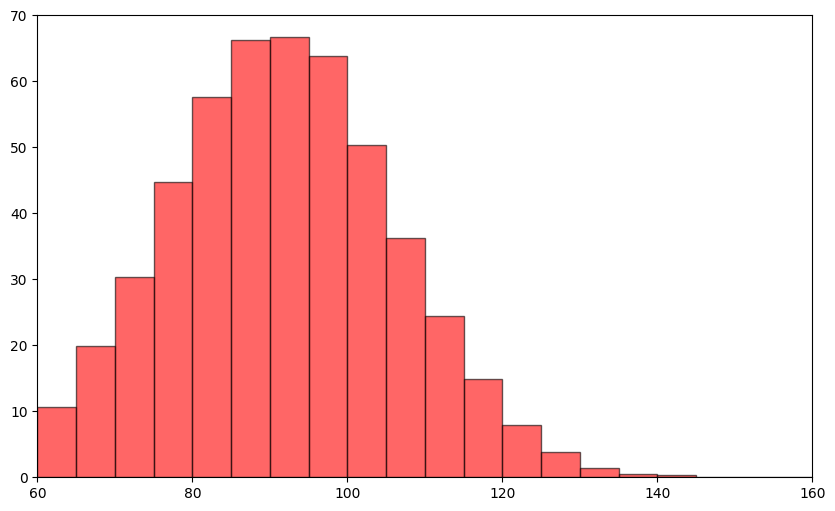

In [742]:
# Defining bin edges for a histogram with 20 equidistant bins between 60 and 160
bins = np.linspace(60, 160, 21)

plt.figure(figsize=(10, 6))
plt.xlim(60, 160)
counts1 = np.histogram(sample1, bins=bins)[0]
plt.hist(bins[:-1], bins=bins, density=False, alpha=0.6, color='r', weights=500/20000*counts1, edgecolor='black')
plt.show()

In [743]:
i = 0
sample2  = np.array([])
while (i<20000):
    rand1 = np.random.uniform(0, 1)
    temp = TruncatedGaussianCDF(np.arange(60, 160, 0.01), 125, 17, xmin, xmax) - rand1
    sample2 = np.append(sample2, np.arange(60, 160, 0.01)[np.abs(temp).argmin()])
    i += 1

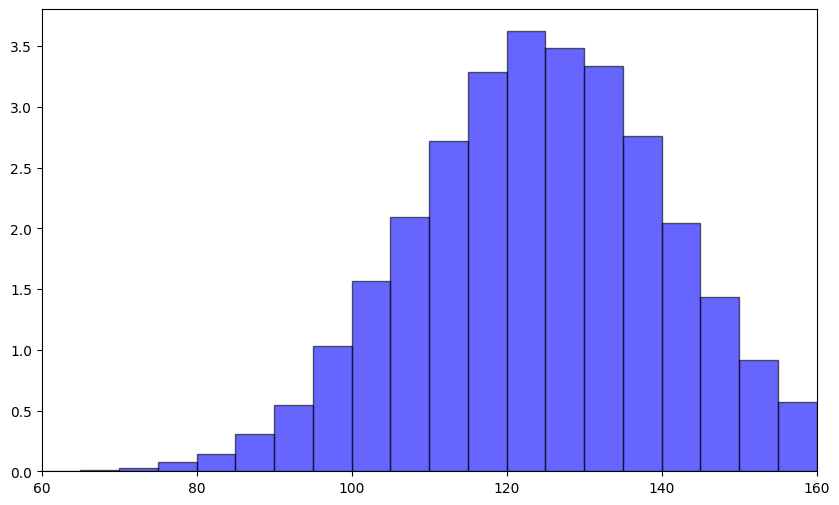

In [744]:
plt.figure(figsize=(10, 6))
counts2 = np.histogram(sample2, bins=bins)[0]
plt.hist(bins[:-1], bins, density=False, alpha=0.6, color='b', weights=30/20000*counts2, edgecolor='black')
plt.xlim(60, 160)
plt.show()

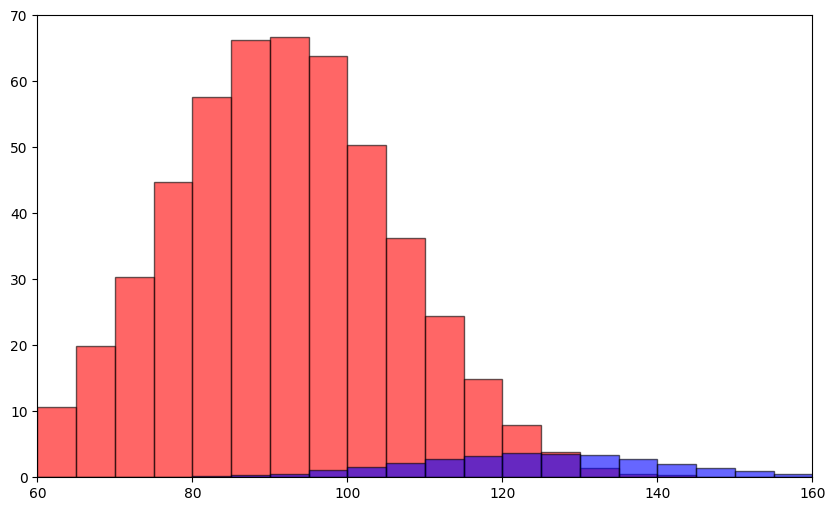

In [745]:
plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, alpha=0.6, color='r', weights=500/20000*counts1, edgecolor='black')
plt.hist(bins[:-1], bins, density=False, alpha=0.6, color='b', weights=30/20000*counts2, edgecolor='black')
plt.xlim(60, 160)
plt.show()

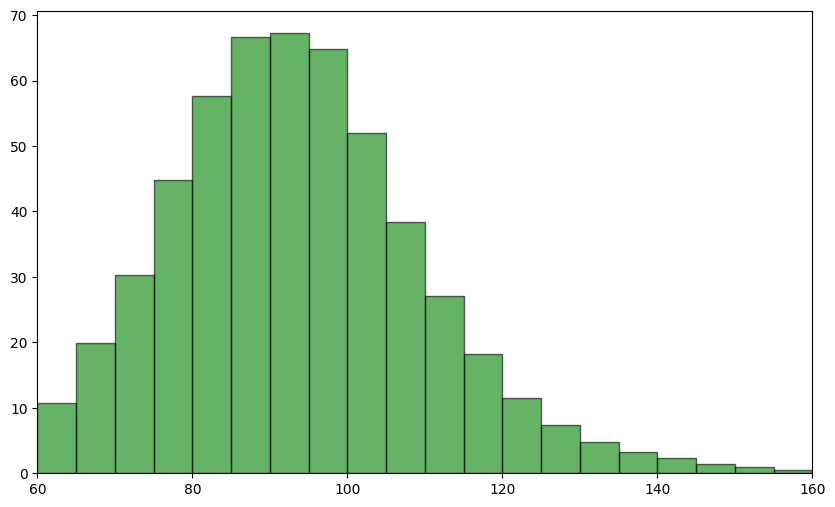

In [746]:
plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, alpha=0.6, color='g', weights=500/20000*counts1 + 30/20000*counts2, edgecolor='black')
plt.xlim(60, 160)
plt.show()